# Importación de Librerías

In [ ]:
import numpy as np
import matplotlib, pylab as plt
from scipy import optimize, interpolate, misc, integrate
import pandas as pd
import sympy as sp
from sympy import simplify, symbols, expand, factor, sin, cos, init_printing
import random as random
init_printing

<function sympy.interactive.printing.init_printing>

# 1. Derivadas

En el metodo Smoothed-particle hydrodynamics (SPH) se emplean diferentes kernel de aproximación para calcular las propiedades de un fluído en cada punto del espacio. Uno de ellos es el Kernel de Lucy detallado a continuación:

**Lucy's Quartic Kernel**


In [ ]:
#Se define una semilla con la que se genera un número aleatorio.
#Ese número será el límite del intervalo para las coordenadas x de los vectores r. 

random.seed(320073)
d_x = random.randint( 0, 100 )
print( f'el intervalo para las x llega hasta: {d_x}' ) 

el intervalo para las x llega hasta: 30


In [ ]:
#Se define otra semilla con la que se genera otro número aleatorio.
#Ese número será el límite del intervalo para las coordenadas y de los vectores r. 


random.seed(512284)
d_y = random.randint( 0, 100 )
print( f'el intervalo para las y llega hasta: {d_y}' ) 

el intervalo para las y llega hasta: 35


In [ ]:
a_x = np.linspace( 0, d_x, 100 )  #Array con 100 coordenadas en x, desde 0 hasta 30
a_y = np.linspace( 0, d_y, 100 )  #Array con 100 coordenadas en y, desde 0 hasta 35

In [ ]:
#Definición de los parámetros

r0 = np.array( [0,0] )
h = 10
alpha_D = 5 / (np.pi*h**2)

In [ ]:
def vector( n ):

  '''
  Función que construye los vectores, en base a los arrays a_x, a_y.
  
  '''

  vector = np.array( [a_x[n], a_y[n]] )  #Se construye un n-ésimo vector con la posición n-ésima en x y y de los arrays a_x, a_y.
  return vector

#vector(0), mini - test

def dif_vec( n ):

  '''
  Función que hace la diferencia entre el vector de origen y los vectores generados.
  
  '''
  dif = r0 - vector(n)
  return dif

#dif_vec(0), mini - test

def mag_vec( n ):

  '''
  Función que calcula la magnitud del vector resultante de la diferencia entre el vector de origen y los vectores generados. 
  
  '''
  
  mag_s = np.dot( dif_vec(n), dif_vec(n) ) #Magnitud al cuadrado usando producto punto.
  mag = np.sqrt( mag_s )   #Se calcula la raíz de la magnitud al cuadrado y con ello se obtiene la magnitud total.
  return mag

#mag_vec(0), mini-test

def q( n ):
  
  '''
  Función que construye escalares q, a partir de los vectores r0 - vector(n)
  
  '''
  
  q = mag_vec(n) / h
  return q

#q(0), mini-test

q_vec = np.vectorize(q) #Se hace necesario vectorizar la función que construye los q.

def W( n ):
  
  '''
  Función que construye el Kernel de Lucy
  
  '''
  
  Term_1 = 1 + 3*q(n)
  Term_2 = ( 1 - q(n) )**3
  
  if 0 <= q(n) <= 1:
    Term = alpha_D * Term_1 * Term_2
    return Term
  elif q(n) > 1 : 
    return 0

#W(0), mini-test

W_vec = np.vectorize(W) #Se hace necesario vectorizar la función que construye el Kernel de Lucy.

In [ ]:
#Nótese que W0 = W(0), por tanto, el Kernel de Lucy depende de q externa e internamente (indirecta y directamente),
#Lo que justifica la construcción de la gráfica en la celda siguiente a esta.

q0 = q_vec(0)
W0 = alpha_D * ( 1 + 3*q0 ) * ( 1 - q0 )**3

print(f'q0 = {q0}')
print(f'W0 = {W0}')
print(f'W(0) = {W(0)}')
print(f'W0 = W(0)')

q0 = 0.0
W0 = 0.015915494309189534
W(0) = 0.015915494309189534
W0 = W(0)


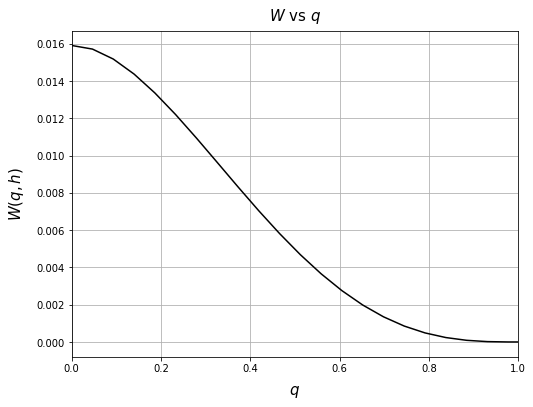

In [ ]:
#Gráfica del Kernel de Lucy para los valores positivos de x.

x_ = np.arange( 0, len(a_x), 1 )  #Se construye un conjunto de puntos n, para evaluar las funciones necesarias. Nótese que son enteros todos

plt.figure( figsize = (8,6) )   #Tamaño de la gráfica

plt.plot( q_vec(x_), W_vec(x_), 'k' )  #Graficamos el Kernel de Lucy, en función de los q.
plt.xlabel( r'$q$', size = 15, labelpad=10 )
plt.ylabel( r'$W(q,h)$', size = 15, labelpad=10 )
plt.title( r'$W$ vs $q$', pad=10, size = 15 )

plt.xlim(0,1)  #A partir de q > 1, W = 0 para toda q, por tanto, la información de la gráfica en esa parte es irrelevante
plt.grid()

In [ ]:
#Implementación de la derivada en sympy.

x = symbols('q')  #Se define la variable simbólica.

W_l = lambda q: alpha_D * ( 1 + 3*q ) * ( 1 - q )**3  #Se define la parte no nula del Kernel de Lucy como una función lambda

#W_l(x), mini-test

Wp = sp.diff( W_l(x), x ) #Se deriva la parte no nula del Kernel de Lucy
Wp

0.0477464829275686*(1 - q)**3 - 3*(1 - q)**2*(0.0477464829275686*q + 0.0159154943091895)

In [ ]:
Wp_np = sp.lambdify( x, Wp, 'numpy' )  #Se convierte la derivada simbólica en una función de numpy

#Wp_np(2), mini-test

In [ ]:
def Wderivate(n):
  
  '''
  
  Función que deriva el Kernel de Lucy.

  '''
  
  if 0 <= q(n) <= 1:
    return Wp_np(q(n))
  elif q(n) > 1 : 
    return 0

Wderivate_vec = np.vectorize(Wderivate) #Se hace necesario vectorizar la derivada del Kernel de Lucy.

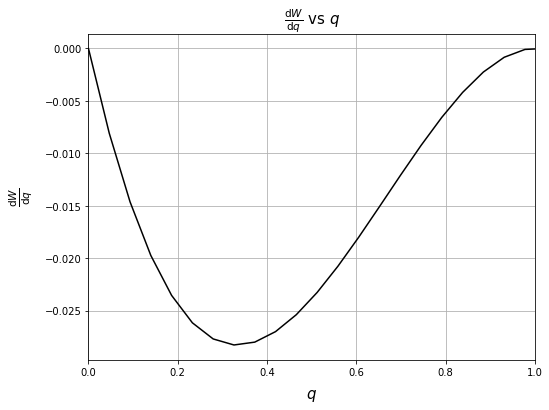

In [ ]:
#Gráfica de la derivada del Kernel de Lucy para los valores positivos de x.

plt.figure( figsize = ( 8, 6 ) )  #Tamaño de la gráfica

plt.plot( q_vec(x_), Wderivate_vec(x_), 'k' )
plt.xlabel( r'$q$', size = 15, labelpad = 10 )
plt.ylabel( r'$\frac{\operatorname{d}W}{\operatorname{d}q}$', size = 15, labelpad = 10 )
plt.title( r'$\frac{\operatorname{d}W}{\operatorname{d}q}$ vs $q$', pad=10, size = 15 )

plt.xlim( 0, 1 )
plt.grid()

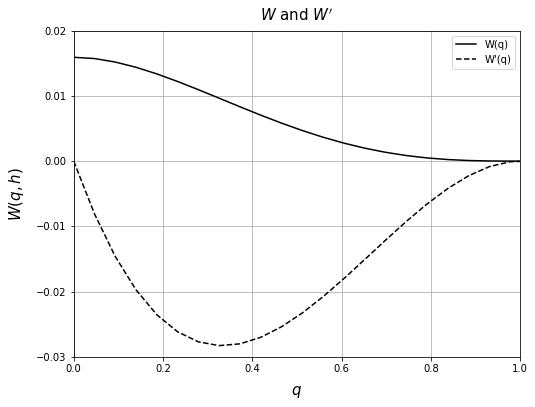

In [ ]:
#Gráfica de la derivada y  del Kernel de Lucy para los valores positivos de x.

plt.figure( figsize = ( 8, 6 ) )  #Tamaño de la gráfica

plt.plot( q_vec(x_), W_vec(x_), 'k-', label = 'W(q)' )
plt.plot( q_vec(x_), Wderivate_vec(x_), 'k--', label = "W'(q)" )
plt.legend()
plt.xlabel( r'$q$', size = 15, labelpad=10 )
plt.ylabel( r'$W(q,h)$', size = 15, labelpad=10 )
plt.title( r"$W$ and $W'$", pad=10, size = 15 )

#Se definen unos límites para la estética de la gráfica.
plt.xlim( 0, 1 )
plt.ylim( -0.03, 0.02 )
plt.grid()

#2. Integración

In [ ]:
epsilon = 1E-05

##1.
$$\int_0^1 e^{1-x^2}\operatorname{d}x$$

In [ ]:
x = sp.symbols('x')
f = lambda x: sp.exp( 1-x**2 )  #Definimos la función simbólicamente.
fpp = sp.diff( f(x), x, 2 )   #Encontramos su segunda derivada.

#fpp mini-test

fn = sp.lambdify( x, fpp, 'numpy' )  #La convertimos a una función de numpy.
f1 = sp.lambdify( x, f(x), 'numpy' )  #Convertimos también la función original a una función de numpy.

#Vectorizamos la función orignial y su segunda derivada.
fn = np.vectorize(fn)
f1 = np.vectorize(f1)

In [ ]:
#Hallamos el máximo de la segunda derivada, dentro del intervalo de interés

max = np.max(fn(a_))
max

2.0

In [ ]:
#De lo anterior, como tenemos asignado un epsilon de 0.00001, tenemos que,

a, b = 0, 1
h = np.sqrt(12*epsilon / ((b - a)*max))
N = int((b - a) // h)
intervalo = np.linspace( 0, 1, N + 1 )
I_1t = integrate.trapz( f1(intervalo), intervalo, h )
I_1q = integrate.quad( f1, 0, 1 )[0]

print(f'El valor de la integral con el método del trapecio es: ' + str('%.5lf'%I_1t))
print(f'El valor de la integral con el método de cuadratura es: ' + str('%.5lf'%I_1q))

El valor de la integral con el método del trapecio es: 2.03007
El valor de la integral con el método de cuadratura es: 2.03008


* **Definición del intervalo para el método de Sympson:**

In [ ]:
fp_4 = sp.diff( f(x), x, 4 ) #Definimos la cuarta derivada simbólicamente.
fp_4np = sp.lambdify( x, fp_4, 'numpy' )  #La convertimos a una función de numpy.

In [ ]:
#Encontramos el máximo de la cuarta derivada en el intervalo de interés

max_ = np.max(fp_4np(a_))
max_

32.61938194150854

In [ ]:
#De lo anterior, como tenemos asignado un epsilon de 0.00001, tenemos que,

h_ = ( 180*epsilon / ((b - a)*max_) )**(1/4)
N_ = int((b - a) // (2*h_))
intervalo_ = np.linspace( a, b, N_ + 1 )
I_1s = integrate.simps(f1(intervalo_), intervalo_, h_)
print(f'El valor de la integral con el método de Sympson es: ' + str('%.5lf'%I_1s))

El valor de la integral con el método de Sympson es: 2.02885


##2.
$$\int_{-\infty}^\infty \frac{\operatorname{d}x}{1+x^2} = 2\int_0^\infty \frac{\operatorname{d}x}{1+x^2} $$

In [ ]:
g = lambda x: 1 / ( 1 + x**2 )  #Construimos la función simbólicamente
g = sp.lambdify( x, g(x), 'numpy' )  #Convertimos a función de numpy

In [ ]:
#Calculamos la integral impropia

I_2q = 2*integrate.quad( g, 0, np.inf )[0]
print(f'El valor de la integral con el método de cuadratura es: ' + str('%.5lf'%I_2q))

El valor de la integral con el método de cuadratura es: 3.14159


##3.
$$\int_{\sin x}^{\cos x}\int_0^\frac{\pi}{4} (2y\sin x + \cos^2x)\operatorname{d}x \operatorname{d}y$$

In [ ]:
y1 = lambda x: 2*sp.sin(x) #+ (sp.cos(x))**2
y1(x)
y2 = lambda x: (sp.cos(x))**2
y2(x)

cos(x)**2

In [ ]:
y1 = sp.lambdify( x, y1(x), 'numpy' )
y2 = sp.lambdify( x, y2(x), 'numpy' )

In [ ]:
I1 = integrate.quad( y1, 0, np.pi/4 )[0]
I2 = integrate.quad( y2, 0, np.pi/4 )[0]

In [ ]:
y = symbols('y')
y3 = lambda y: I1*y + I2
y3(y)

0.308425137534042*y + 0.642699081698724

In [ ]:
I3 = sp.integrate( y3(y), y, (y, sp.sin(x), sp.cos(x)) )
I3

-0.0514041895890071*sin(x)**3 - 0.321349540849362*sin(x)**2 + 0.0514041895890071*cos(x)**3 + 0.321349540849362*cos(x)**2

##4.
$$\int_e^{2e} \frac{\operatorname{d}x}{\ln x}$$

In [ ]:
#Construimos las funciones simbólicamente.

z = lambda x: 1 / sp.ln(x)
zpp = sp.diff( z(x), x, 2 )
zp_4 = sp.diff( z(x), x, 4 )

#Convertimos a funciones de numpy.

z = np.vectorize(sp.lambdify( x, z(x), 'numpy' ))
zpp = sp.lambdify( x, zpp, 'numpy' )
zp_4 = sp.lambdify( x, zp_4, 'numpy' )

In [ ]:
Inter = np.linspace( np.e, 2*np.e )
max3 = np.max( zpp(Inter) )
max3

0.4060058497098381

In [ ]:
h3 = np.sqrt(12*epsilon / ((2*np.e - np.e)*max3))
N3 = (2*np.e - np.e) // h3

In [ ]:
intervalo3 = np.linspace( np.e, 2*np.e, int(N3) + 1 )
I_3t = integrate.trapz( z(intervalo3), intervalo3, h3 )
I_3q = integrate.quad( z, np.e, 2*np.e )[0]

print(f'El valor de la integral con el método del trapecio es: ' + str('%.5lf'%I_3t))
print(f'El valor de la integral con el método de cuadratura es: ' + str('%.5lf'%I_3q))

El valor de la integral con el método del trapecio es: 2.00381
El valor de la integral con el método de cuadratura es: 2.00381


* **Definición del intervalo para el método de Sympson:**

In [ ]:
#Encontramos el máximo de la cuarta derivada en el intervalo de interés

max_3 = np.max(fp_4np(Inter))
max_3

0.8918204069528738

In [ ]:
#De lo anterior, como tenemos asignado un epsilon de 0.00001, tenemos que,

h_3 = ( 180*epsilon / ((b - a)*max_3) )**(1/4)
N_3 = int((b - a) // (2*h_3))
intervalo_3 = np.linspace( a, b, N_3 + 1 )
I_3s = integrate.simps(f1(intervalo_3), intervalo_3, h_3)
print(f'El valor de la integral con el método de Sympson es: ' + str('%.5lf'%I_3s))

El valor de la integral con el método de Sympson es: 2.03105
